# Exploring Neural Networks with Fashion MNIST

ANNs are intensively used for their ability to learn and model the relationships between input and output data that are nonlinear and complex, and so the problem of choice is fashion classification using grayscale images from Fashion MNIST dataset. Both the training instances and the labels will be read as NumPy arrays. Each picture is 28x28 pixels. The dataset consists of a training set of 60.000 examples and a test set of 10.000 examples. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. Each training and test instance is assigned to one of the following labels: 0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag and 9 Ankle boot. We choose to perform a supervised learning based classification task. To do so, we aim to learn to predict clothes based on 28x28 grayscale images using an ANN classifier.

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

## Requirement

In [ ]:
!pip install tensorflow-gpu==2.8

In [2]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt

## Step 1: Data Preprocessing
### Loading the dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# class names are not included in dataset, so we need to create them to plot the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Exploring and visualizing the data

In [4]:
print("Train images:", X_train.shape)
print("Test images:", X_test.shape)

Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


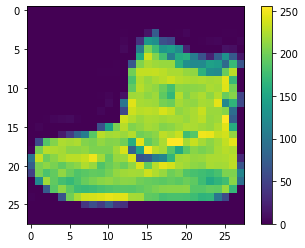

In [5]:
# visualize the first image from the training dataset
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

### Normalizing the data

In [6]:
# scale the values to a range of 0 to 1 of both training and test sets
X_train = X_train / 255.0
X_test = X_test / 255.0

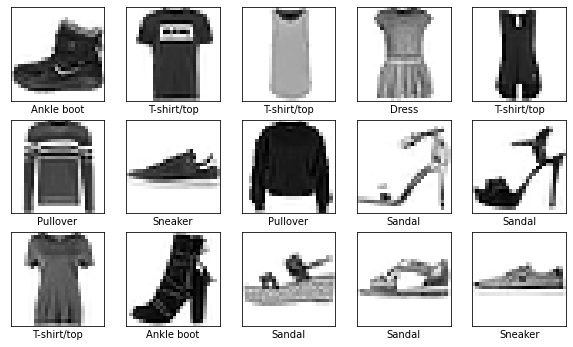

In [7]:
# display the first 15 images from the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(15):
	plt.subplot(5, 5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(X_train[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[y_train[i]])

## Step 2: Building an ANN

### Build the architecture

In [8]:
# model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [9]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [10]:
# 5 epochs and split the training set into 80/20 for validation
history_NN3_5 = model_3.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5196 - accuracy: 0.8195 - val_loss: 0.4590 - val_accuracy: 0.8292
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3933 - accuracy: 0.8573 - val_loss: 0.3831 - val_accuracy: 0.8639
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3502 - accuracy: 0.8721 - val_loss: 0.3568 - val_accuracy: 0.8733
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3252 - accuracy: 0.8807 - val_loss: 0.3521 - val_accuracy: 0.8746
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3047 - accuracy: 0.8865 - val_loss: 0.3357 - val_accuracy: 0.8804


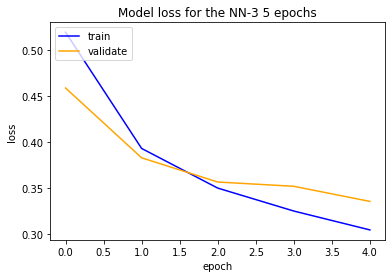

In [11]:
# plot loss results for training data and testing data 
plt.plot(history_NN3_5.history['loss'], 'blue')
plt.plot(history_NN3_5.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3 5 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

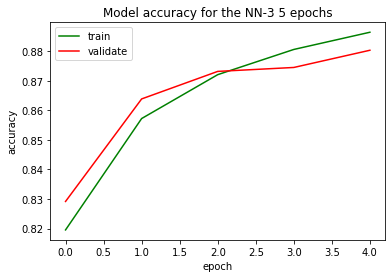

In [12]:
# plot accuracy results for training data and testing data 
plt.plot(history_NN3_5.history['accuracy'], 'green')
plt.plot(history_NN3_5.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-3 5 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

## Step 3: Evaluate the model

In [13]:
test_loss_NN3_5, test_acc_NN3_5 = model_3.evaluate(X_test, y_test)
print("NN-3 - 5 epochs - test loss:", test_loss_NN3_5 * 100)
print("NN-3 - 5 epochs - test accuracy:", test_acc_NN3_5 * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8692
NN-3 - 5 epochs - test loss: 36.61675751209259
NN-3 - 5 epochs - test accuracy: 86.91999912261963


In [14]:
# confidence of the model that the image corresponds to the label 
predictions_NN3_5 = model_3.predict(X_test)
predictions_NN3_5.shape
predictions_NN3_5[6]

array([1.6027005e-04, 4.5646519e-07, 4.0555518e-02, 3.6138863e-05,
       9.3606216e-01, 9.1845990e-08, 2.3144105e-02, 8.4612619e-09,
       4.1188556e-05, 5.7070473e-08], dtype=float32)

In [15]:
np.argmax(predictions_NN3_5[6])

4

In [16]:
class_names[4]

'Coat'

In [17]:
# "Coat" has the highest confidence value 
y_test[6]

4

In [18]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# plot the value array 
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

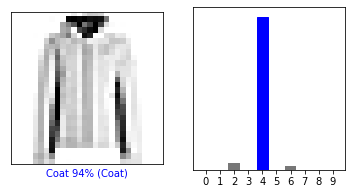

In [19]:
# look at 6th image, predictions and prediction array
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_NN3_5[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_NN3_5[i],  y_test)
plt.show()

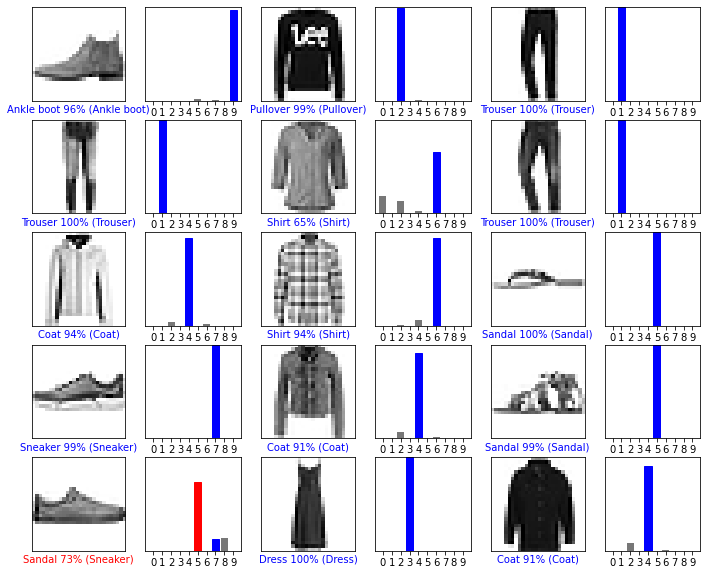

In [20]:
# plot the first 15 test images, their predicted labels and the true labels
# color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_NN3_5[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_NN3_5[i], y_test)

## Let's build a deeper model

### Comparing network depth with a NN-6 and NN-12

In [25]:
# model a 6-layer neural network
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_6.summary()
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 151,306
Trainable params: 151,306
Non-tr

In [26]:
# train the NN-6 with 5 epochs 
model_6.fit(X_train, y_train, epochs=5, validation_split=0.2)

test_loss_NN6_5, test_acc_NN6_5 = model_6.evaluate(X_test, y_test)
print("NN-6 - 5 epochs - test loss:", test_loss_NN6_5 * 100)
print("NN-6 - 5 epochs - test accuracy:", test_acc_NN6_5 * 100)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5121 - accuracy: 0.8147 - val_loss: 0.4328 - val_accuracy: 0.8460
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3828 - accuracy: 0.8585 - val_loss: 0.4010 - val_accuracy: 0.8503
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3459 - accuracy: 0.8718 - val_loss: 0.3530 - val_accuracy: 0.8693
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3206 - accuracy: 0.8809 - val_loss: 0.3571 - val_accuracy: 0.8729
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3670 - accuracy: 0.8709
NN-6 - 5 epochs - test loss: 36.69973015785217
NN-6 - 5 epochs - test accuracy: 87.08999752998352


In [27]:
# model a 12-layer neural network 
model_12 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_12.summary() 
model_12.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)              

In [28]:
# train the NN-12 with 5 epochs 
model_12.fit(X_train, y_train, epochs=5, validation_split=0.2)

test_loss_NN12_5, test_acc_NN12_5 = model_12.evaluate(X_test, y_test)
print("NN-12 - 5 epochs - test loss:", test_loss_NN12_5 * 100)
print("NN-12 - 5 epochs - test accuracy:", test_acc_NN12_5 * 100)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6209 - accuracy: 0.7665 - val_loss: 0.4490 - val_accuracy: 0.8390
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4379 - accuracy: 0.8431 - val_loss: 0.4070 - val_accuracy: 0.8548
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3926 - accuracy: 0.8600 - val_loss: 0.4039 - val_accuracy: 0.8585
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3718 - accuracy: 0.8681 - val_loss: 0.3744 - val_accuracy: 0.8691
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8634
NN-12 - 5 epochs - test loss: 37.9316508769989
NN-12 - 5 epochs - test accuracy: 86.33999824523926


## Can we improve our classification by increasing the number of epochs?

### Train the NN-3 with 50 epochs and plot the loss and accuracy

In [29]:
# train the NN-3 with 50 epochs
history_NN3_50 = model_3.fit(X_train, y_train, epochs=50, validation_split=0.2)

test_loss_NN3_50, test_acc_NN_50 = model_3.evaluate(X_test, y_test)
print("NN-3 - 50 epochs - test loss:", test_loss_NN3_50 * 100)
print("NN-3 - 50 epochs - test accuracy:", test_acc_NN_50 * 100)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2894 - accuracy: 0.8934 - val_loss: 0.3283 - val_accuracy: 0.8832
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2739 - accuracy: 0.8988 - val_loss: 0.3081 - val_accuracy: 0.8905
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2617 - accuracy: 0.9019 - val_loss: 0.3366 - val_accuracy: 0.8792
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2537 - accuracy: 0.9054 - val_loss: 0.3128 - val_accuracy: 0.8882
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2449 - accuracy: 0.9088 - val_loss: 0.3325 - val_accuracy: 0.8829
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2349 - accuracy: 0.9126 - val_loss: 0.3256 - val_accuracy: 0.8856
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2255 - accuracy: 0.9167 - val_loss: 0.3289 - val_accuracy:

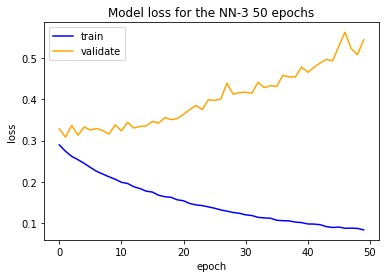

In [30]:
plt.plot(history_NN3_50.history['loss'], 'blue')
plt.plot(history_NN3_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3 50 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

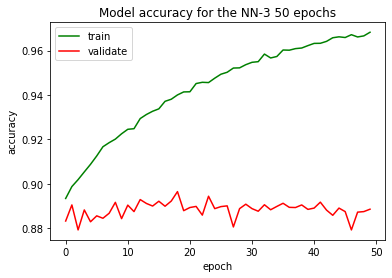

In [31]:
plt.plot(history_NN3_50.history['accuracy'], 'green')
plt.plot(history_NN3_50.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-3 50 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

### Train the NN-6 with 50 epochs and plot the loss and accuracy

In [32]:
# train the NN-6 with 50 epochs
history_NN6_50 = model_6.fit(X_train, y_train, epochs=50, validation_split=0.2)

test_loss_NN6_50, test_acc_NN6_50 = model_6.evaluate(X_test, y_test)
print("NN-6 - 50 epochs - test loss:", test_loss_NN6_50 * 100)
print("NN-6 - 50 epochs - test accuracy:", test_acc_NN6_50 * 100)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2875 - accuracy: 0.8930 - val_loss: 0.3292 - val_accuracy: 0.8810
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2758 - accuracy: 0.8955 - val_loss: 0.3131 - val_accuracy: 0.8844
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2627 - accuracy: 0.9004 - val_loss: 0.3475 - val_accuracy: 0.8788
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2514 - accuracy: 0.9052 - val_loss: 0.3308 - val_accuracy: 0.8865
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2439 - accuracy: 0.9083 - val_loss: 0.3192 - val_accuracy: 0.8881
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2361 - accuracy: 0.9106 - val_loss: 0.3404 - val_accuracy: 0.8852
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2308 - accuracy: 0.9129 - val_loss: 0.3297 - val_accuracy:

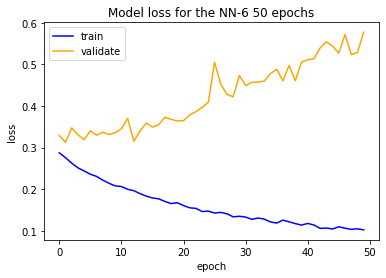

In [33]:
plt.plot(history_NN6_50.history['loss'], 'blue')
plt.plot(history_NN6_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-6 50 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

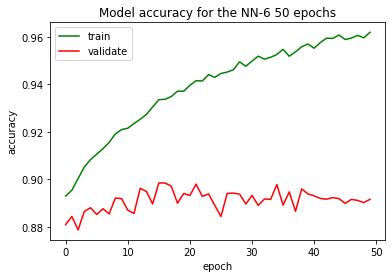

In [34]:
plt.plot(history_NN6_50.history['accuracy'], 'green')
plt.plot(history_NN6_50.history['val_accuracy'],'red')
plt.title('Model accuracy for the NN-6 50 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

### Train the NN-12 with 50 epochs and plot the loss and accuracy

In [51]:
# train the NN-12 with 50 epochs
history_NN12_50 = model_12.fit(X_train, y_train, epochs=50, validation_split=0.2)

test_loss_NN12_50, test_acc_NN12_50 = model_12.evaluate(X_test, y_test)
print("NN-12 - 50 epochs - test loss:", test_loss_NN12_50 * 100)
print("NN-12 - 50 epochs - test accuracy:", test_acc_NN12_50 * 100)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1457 - accuracy: 0.9466 - val_loss: 0.4801 - val_accuracy: 0.8888
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1429 - accuracy: 0.9484 - val_loss: 0.4882 - val_accuracy: 0.8864
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1463 - accuracy: 0.9472 - val_loss: 0.5016 - val_accuracy: 0.8878
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1562 - accuracy: 0.9441 - val_loss: 0.4496 - val_accuracy: 0.8844
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1437 - accuracy: 0.9488 - val_loss: 0.5400 - val_accuracy: 0.8839
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1438 - accuracy: 0.9487 - val_loss: 0.4844 - val_accuracy: 0.8921
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1448 - accuracy: 0.9489 - val_loss: 0.4607 - val_accuracy:

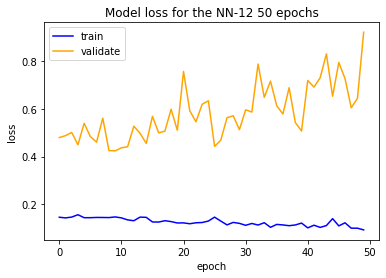

In [52]:
plt.plot(history_NN12_50.history['loss'], 'blue')
plt.plot(history_NN12_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-12 50 epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

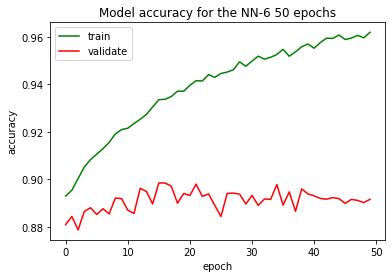

In [53]:
plt.plot(history_NN6_50.history['accuracy'], 'green')
plt.plot(history_NN6_50.history['val_accuracy'],'red')
plt.title('Model accuracy for the NN-6 50 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

### Visualizing the predictions for NN-3 and NN-12


In [54]:
predictions_NN3_50 = model_3.predict(X_test)
predictions_NN3_50.shape
predictions_NN3_50[0]

array([1.6188568e-22, 3.4378010e-24, 7.4976142e-20, 1.5506062e-27,
       5.1768146e-26, 1.4188231e-13, 1.4202425e-20, 7.5061273e-09,
       6.9340465e-22, 1.0000000e+00], dtype=float32)

In [55]:
np.argmax(predictions_NN3_50[0])

9

In [56]:
class_names[9]

'Ankle boot'

In [57]:
y_test[0]

9

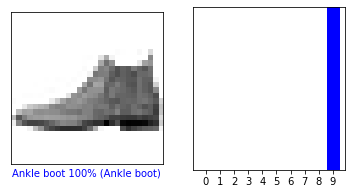

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_NN3_50[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_NN3_50[i],  y_test)
plt.show()

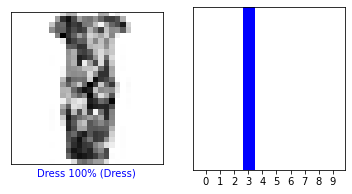

In [59]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_NN3_50[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_NN3_50[i],  y_test)
plt.show()

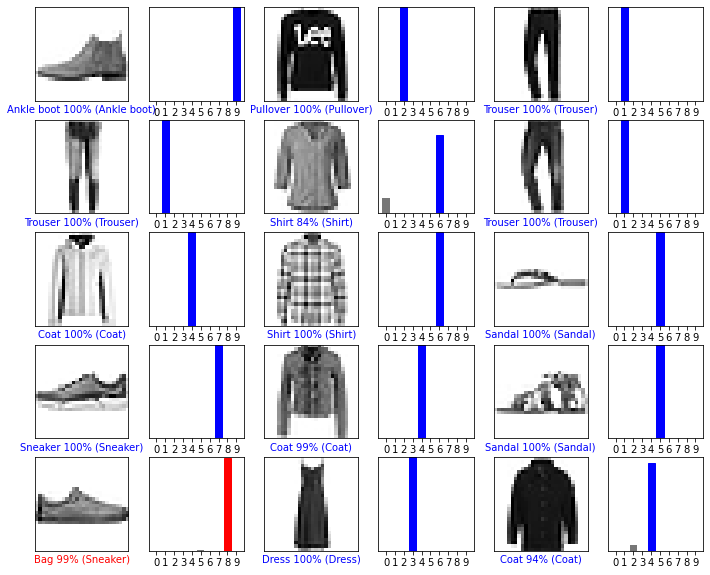

In [60]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images with NN-3 50 epochs")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_NN3_50[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_NN3_50[i], y_test)

In [61]:
predictions_NN12_50 = model_12.predict(X_test)
predictions_NN12_50.shape
predictions_NN12_50[1000]

array([4.5132093e-02, 6.8765007e-06, 5.1365127e-03, 8.5015967e-03,
       1.3415377e-03, 2.5602060e-03, 9.3517524e-01, 1.1997950e-06,
       2.1424254e-03, 2.2731483e-06], dtype=float32)

In [62]:
np.argmax(predictions_NN12_50[1000])

6

In [63]:
class_names[6]

'Shirt'

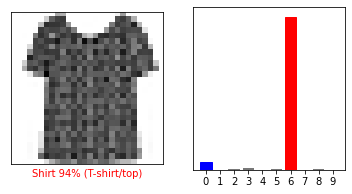

In [64]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_NN12_50[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_NN12_50[i],  y_test)
plt.show()

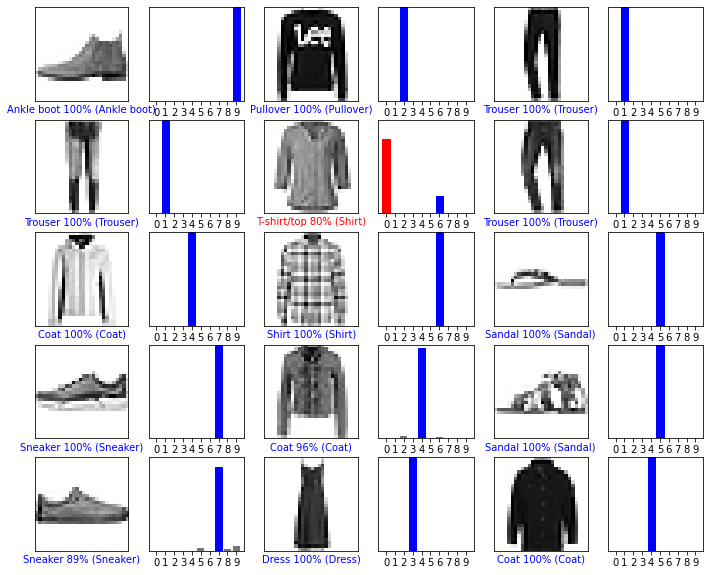

In [65]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_NN12_50[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_NN12_50[i], y_test)

## Conclusion 
For this simple problem, 5 epochs are sufficient for training the models, since the trend either stabilizes or gets worse after 5 epochs.